In [4]:
# Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import neattext.functions as nfx
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn import preprocessing 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from textblob import TextBlob
from collections import defaultdict
from wordcloud.wordcloud import WordCloud,STOPWORDS
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Loading the dataset
data = pd.read_csv('reviews.csv')
data

Text
0     iPhone11 Review A person who uses every major ...
1     So far its going good, has been a great purcha...
2     Its value for money iPhone. Its has served me ...
3     This is my first iPhone. After being an Androi...
4     Been almost 10 months I have been using the iP...
...                                                 ...
3095                                    Awsum go for it
3096  Received damaged phone paint off on the edges ...
3097                                  Apple is the best
3098  Excellent in every aspect. Camera is mind blow...
3099                                         Nice phone

[3100 rows x 1 columns]

In [7]:
print("The shape of Data is (row,column) : "+str(data.shape))

The shape of Data is (row,column) : (3100, 1)


# EDA

In [8]:
# Handling Nan Values
data.isna().sum()

Text    39
dtype: int64

In [9]:
data = data[data.Text.notnull()]
print(data)

                                                   Text
0     iPhone11 Review A person who uses every major ...
1     So far its going good, has been a great purcha...
2     Its value for money iPhone. Its has served me ...
3     This is my first iPhone. After being an Androi...
4     Been almost 10 months I have been using the iP...
...                                                 ...
3095                                    Awsum go for it
3096  Received damaged phone paint off on the edges ...
3097                                  Apple is the best
3098  Excellent in every aspect. Camera is mind blow...
3099                                         Nice phone

[3061 rows x 1 columns]


In [10]:
print("The shape of Data is (row,column) : "+str(data.shape))

The shape of Data is (row,column) : (3061, 1)


In [11]:
# Handling Nan Values
data.isna().sum()

Text    0
dtype: int64

In [12]:
# Polarity
data['Polarity'] = data['Text'].map(lambda text: TextBlob(text).sentiment.polarity)
data

Text  Polarity
0     iPhone11 Review A person who uses every major ...  0.200110
1     So far its going good, has been a great purcha...  0.435185
2     Its value for money iPhone. Its has served me ...  0.000000
3     This is my first iPhone. After being an Androi...  0.136891
4     Been almost 10 months I have been using the iP...  0.206533
...                                                 ...       ...
3095                                    Awsum go for it  0.000000
3096  Received damaged phone paint off on the edges ...  0.000000
3097                                  Apple is the best  1.000000
3098  Excellent in every aspect. Camera is mind blow...  1.000000
3099                                         Nice phone  0.600000

[3061 rows x 2 columns]

In [13]:
def polarity(row):
    '''This function returns sentiment value based on the overall ratings from the users'''
    if row['Polarity'] > 0.0:
        val = 'Positive'
    elif row['Polarity'] < 0.0:
        val = 'Negative'
    elif row['Polarity'] == 0.0:
        val = 'Neutral'
    else:
        val = -1
    return val

In [14]:
# Applying the function in our new column
data['Sentiment'] = data.apply(polarity,axis=1)
data

Text  Polarity Sentiment
0     iPhone11 Review A person who uses every major ...  0.200110  Positive
1     So far its going good, has been a great purcha...  0.435185  Positive
2     Its value for money iPhone. Its has served me ...  0.000000   Neutral
3     This is my first iPhone. After being an Androi...  0.136891  Positive
4     Been almost 10 months I have been using the iP...  0.206533  Positive
...                                                 ...       ...       ...
3095                                    Awsum go for it  0.000000   Neutral
3096  Received damaged phone paint off on the edges ...  0.000000   Neutral
3097                                  Apple is the best  1.000000  Positive
3098  Excellent in every aspect. Camera is mind blow...  1.000000  Positive
3099                                         Nice phone  0.600000  Positive

[3061 rows x 3 columns]

In [15]:
data.drop(['Polarity'], axis=1,inplace=True)
data

Text Sentiment
0     iPhone11 Review A person who uses every major ...  Positive
1     So far its going good, has been a great purcha...  Positive
2     Its value for money iPhone. Its has served me ...   Neutral
3     This is my first iPhone. After being an Androi...  Positive
4     Been almost 10 months I have been using the iP...  Positive
...                                                 ...       ...
3095                                    Awsum go for it   Neutral
3096  Received damaged phone paint off on the edges ...   Neutral
3097                                  Apple is the best  Positive
3098  Excellent in every aspect. Camera is mind blow...  Positive
3099                                         Nice phone  Positive

[3061 rows x 2 columns]

In [16]:
data['Sentiment'].value_counts()

Positive    2468
Neutral      373
Negative     220
Name: Sentiment, dtype: int64

In [17]:
df = pd.DataFrame(data)
df.to_csv('amazon.csv', index=False)

In [18]:
# again reading the csv file
df = pd.read_csv('amazon.csv')
df

Text Sentiment
0     iPhone11 Review A person who uses every major ...  Positive
1     So far its going good, has been a great purcha...  Positive
2     Its value for money iPhone. Its has served me ...   Neutral
3     This is my first iPhone. After being an Androi...  Positive
4     Been almost 10 months I have been using the iP...  Positive
...                                                 ...       ...
3056                                    Awsum go for it   Neutral
3057  Received damaged phone paint off on the edges ...   Neutral
3058                                  Apple is the best  Positive
3059  Excellent in every aspect. Camera is mind blow...  Positive
3060                                         Nice phone  Positive

[3061 rows x 2 columns]

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

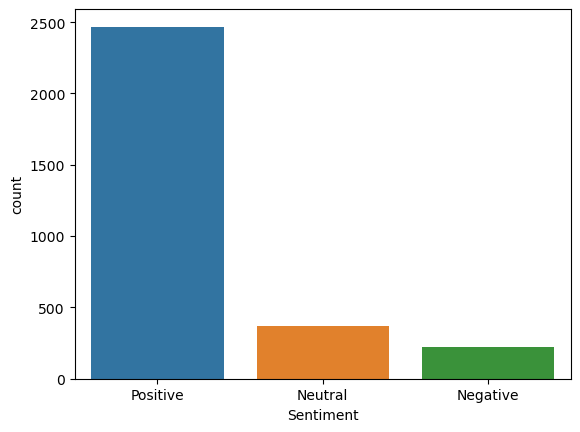

In [19]:
# Plot
sns.countplot(x='Sentiment',data=df)

In [20]:
df['Clean_text'] = df['Text'].apply(nfx.remove_userhandles)
df['Clean_text'] = df['Clean_text'].apply(nfx.remove_stopwords)
df['Clean_text'] = df['Clean_text'].apply(nfx.remove_special_characters)

In [21]:
df

Text Sentiment  \
0     iPhone11 Review A person who uses every major ...  Positive   
1     So far its going good, has been a great purcha...  Positive   
2     Its value for money iPhone. Its has served me ...   Neutral   
3     This is my first iPhone. After being an Androi...  Positive   
4     Been almost 10 months I have been using the iP...  Positive   
...                                                 ...       ...   
3056                                    Awsum go for it   Neutral   
3057  Received damaged phone paint off on the edges ...   Neutral   
3058                                  Apple is the best  Positive   
3059  Excellent in every aspect. Camera is mind blow...  Positive   
3060                                         Nice phone  Positive   

                                             Clean_text  
0     iPhone11 Review person uses major application ...  
1     far going good great purchase upgrading Iphone...  
2           value money iPhone served till serving well  
3     iPhone Android enthusiast loyalist decade poor...  
4     10 months iPhone 11 128 GB Apple known premium...  
...                                                 ...  
3056                                              Awsum  
3057  Received damaged phone paint edges cameraNeed ...  
3058                                         Apple best  
3059               Excellent aspect Camera mind blowing  
3060                                         Nice phone  

[3061 rows x 3 columns]

In [23]:
# Filtering data
review_pos = df[df['Sentiment']=='Positive'].dropna()
review_neu = df[df['Sentiment']=='Neutral'].dropna()
review_neg = df[df['Sentiment']=='Negative'].dropna()

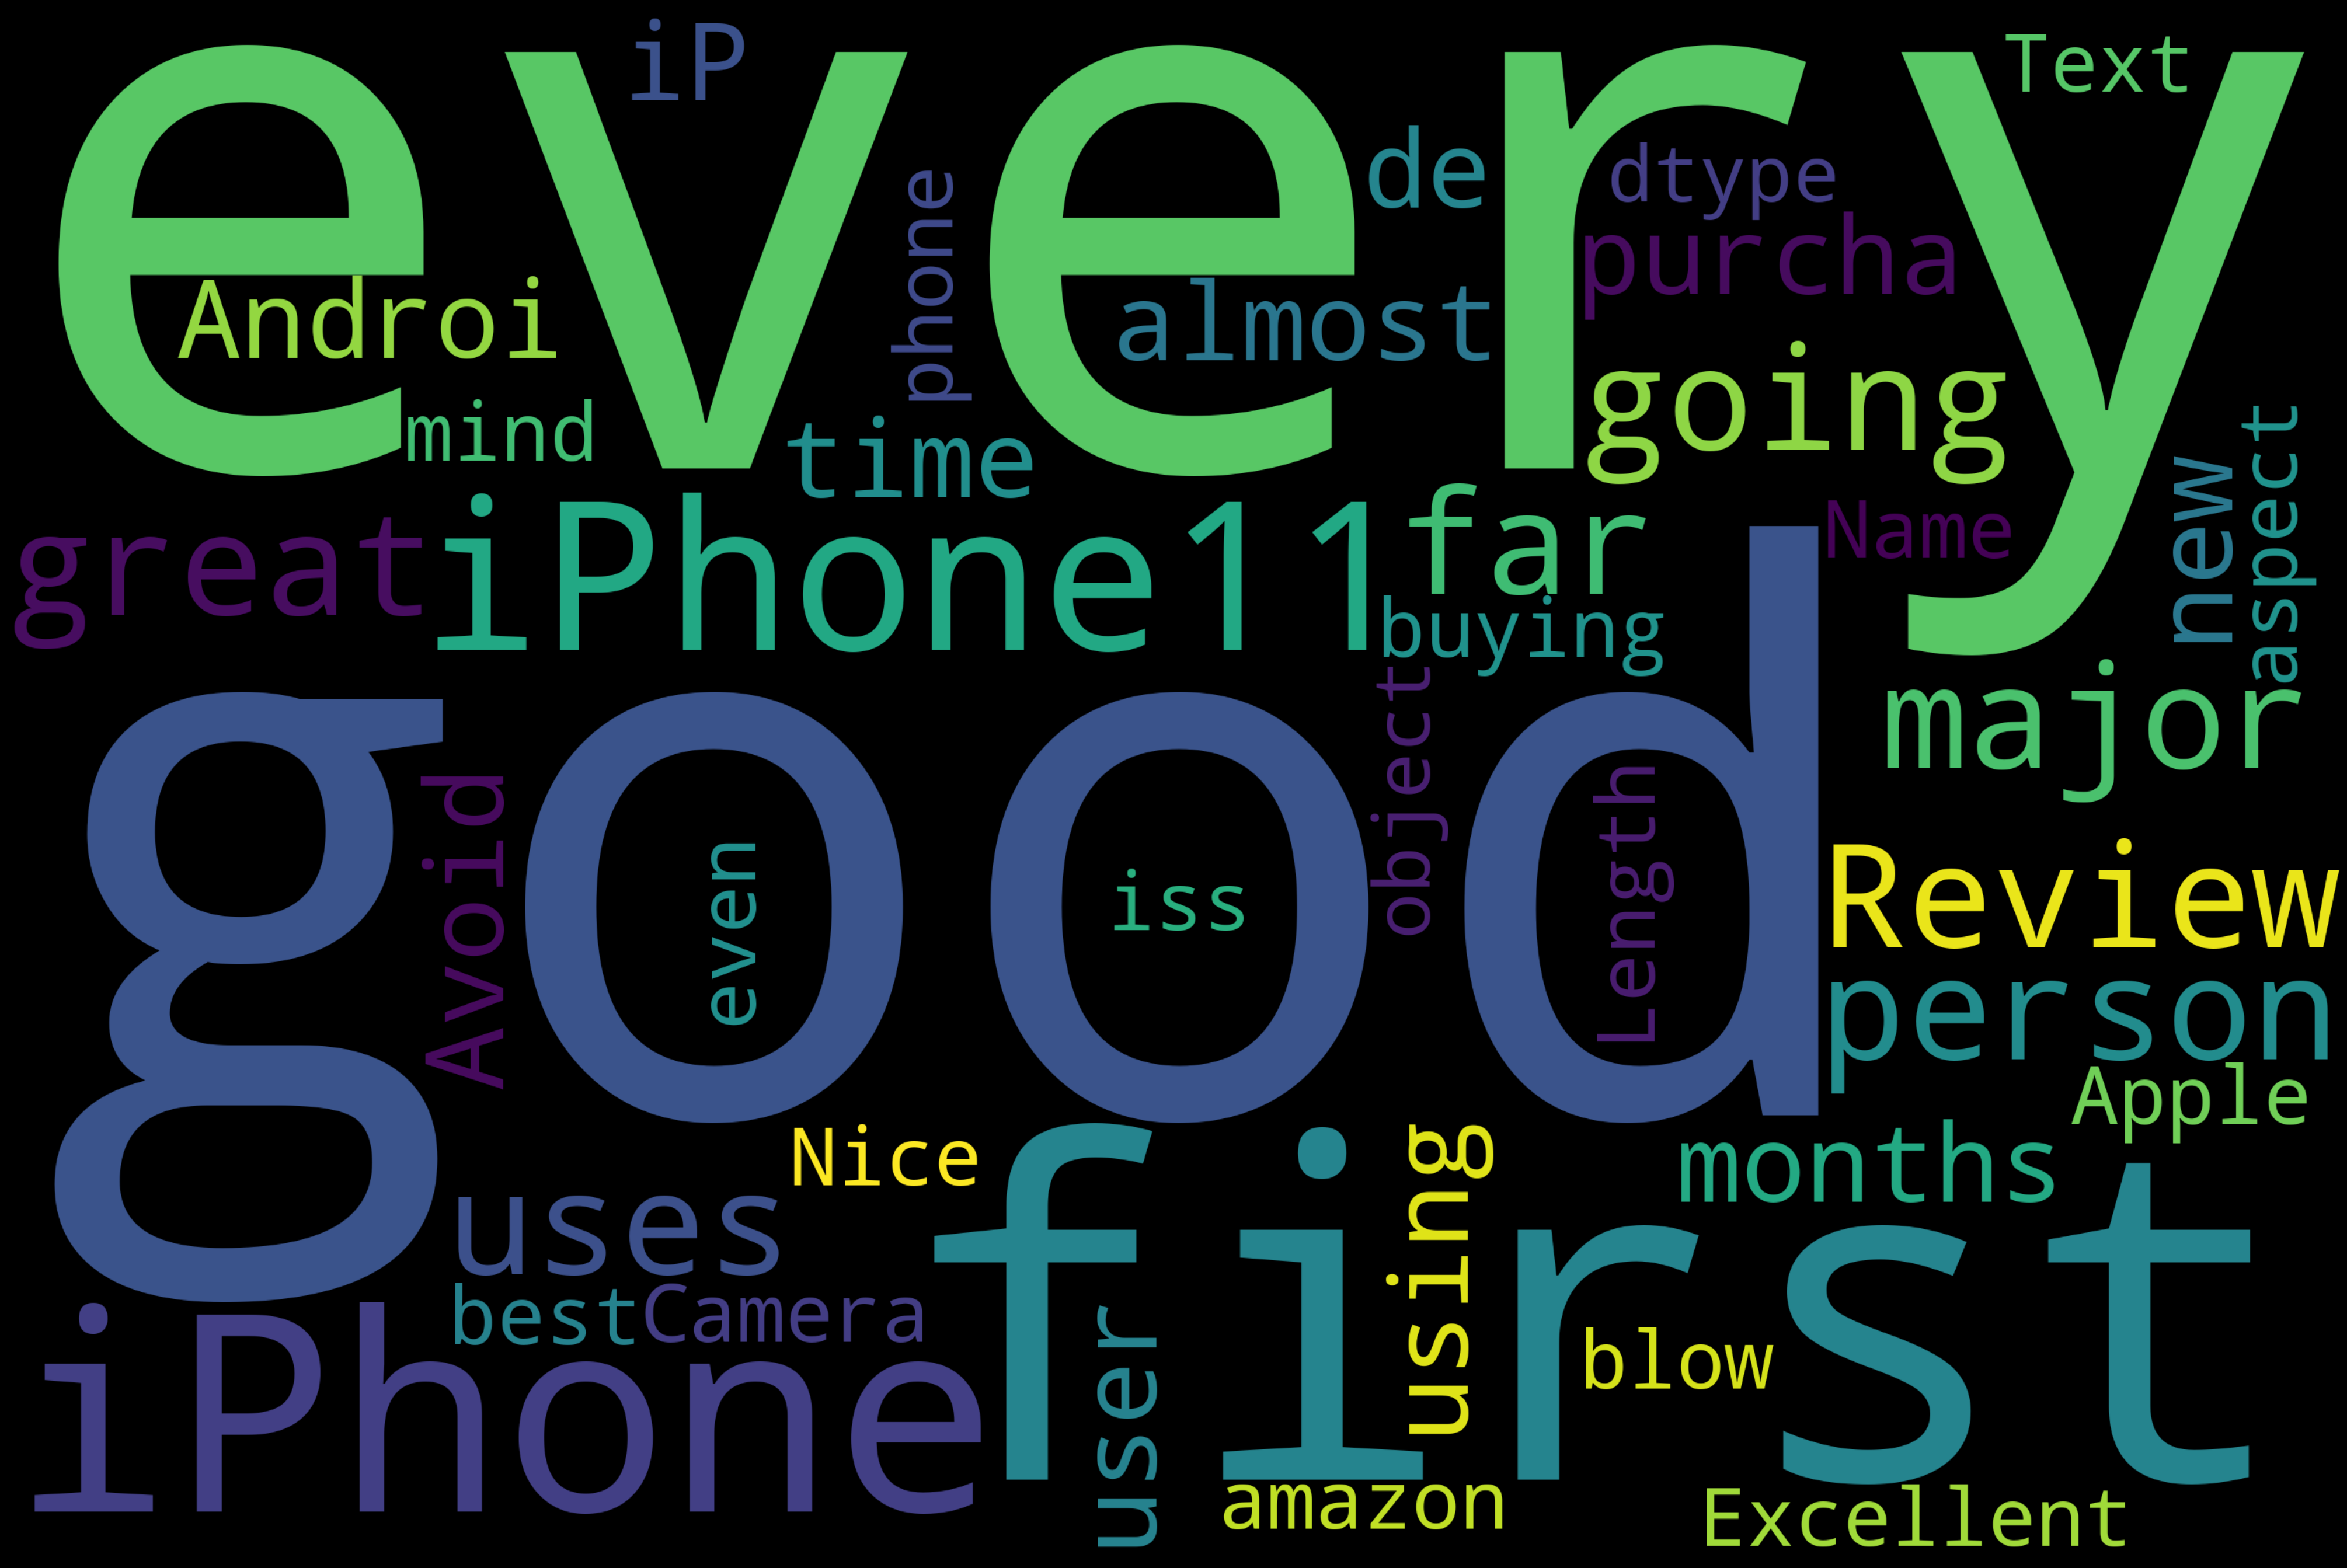

In [24]:
# Positive word cloud
text = review_pos["Text"]
wordcloud = WordCloud(width=3000,height=2000, background_color='black',stopwords=STOPWORDS).generate(str(text))

fig = plt.figure(figsize=(40,30),facecolor='k',edgecolor='k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

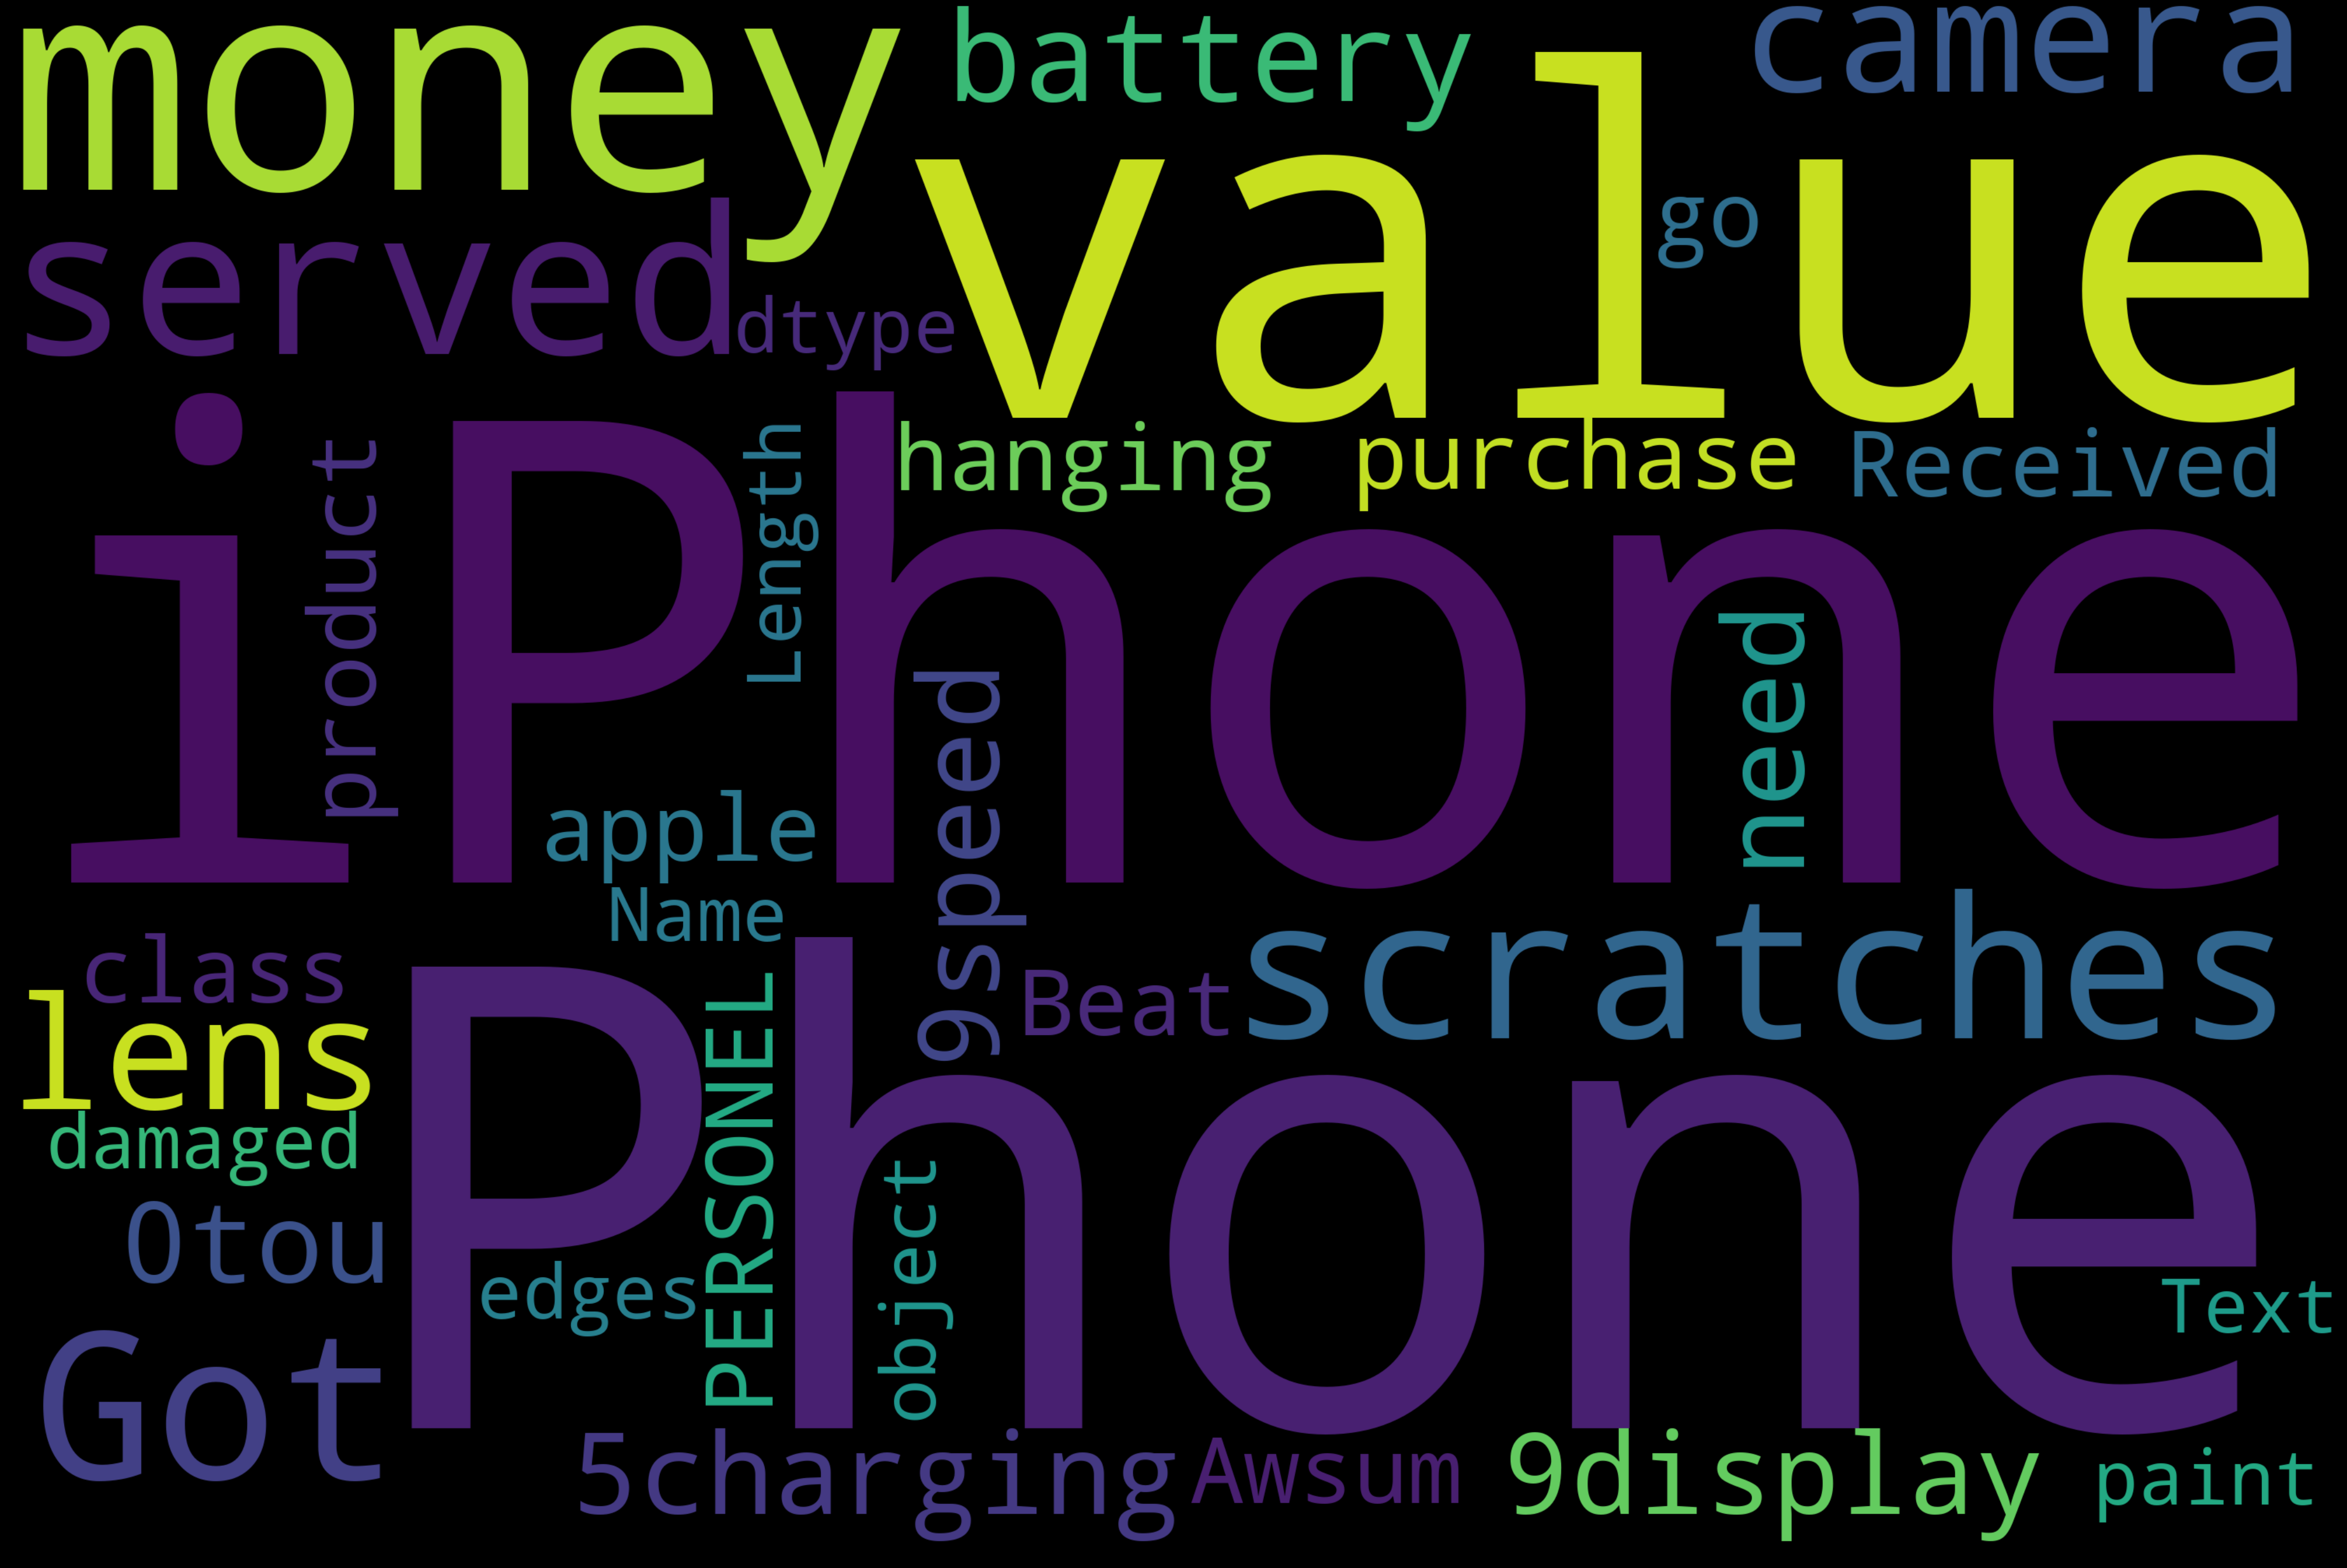

In [25]:
# Neutral Word Cloud
text = review_neu["Text"]
wordcloud = WordCloud(width=3000,height=2000, background_color='black',stopwords=STOPWORDS).generate(str(text))

fig = plt.figure(figsize=(40,30),facecolor='k',edgecolor='k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

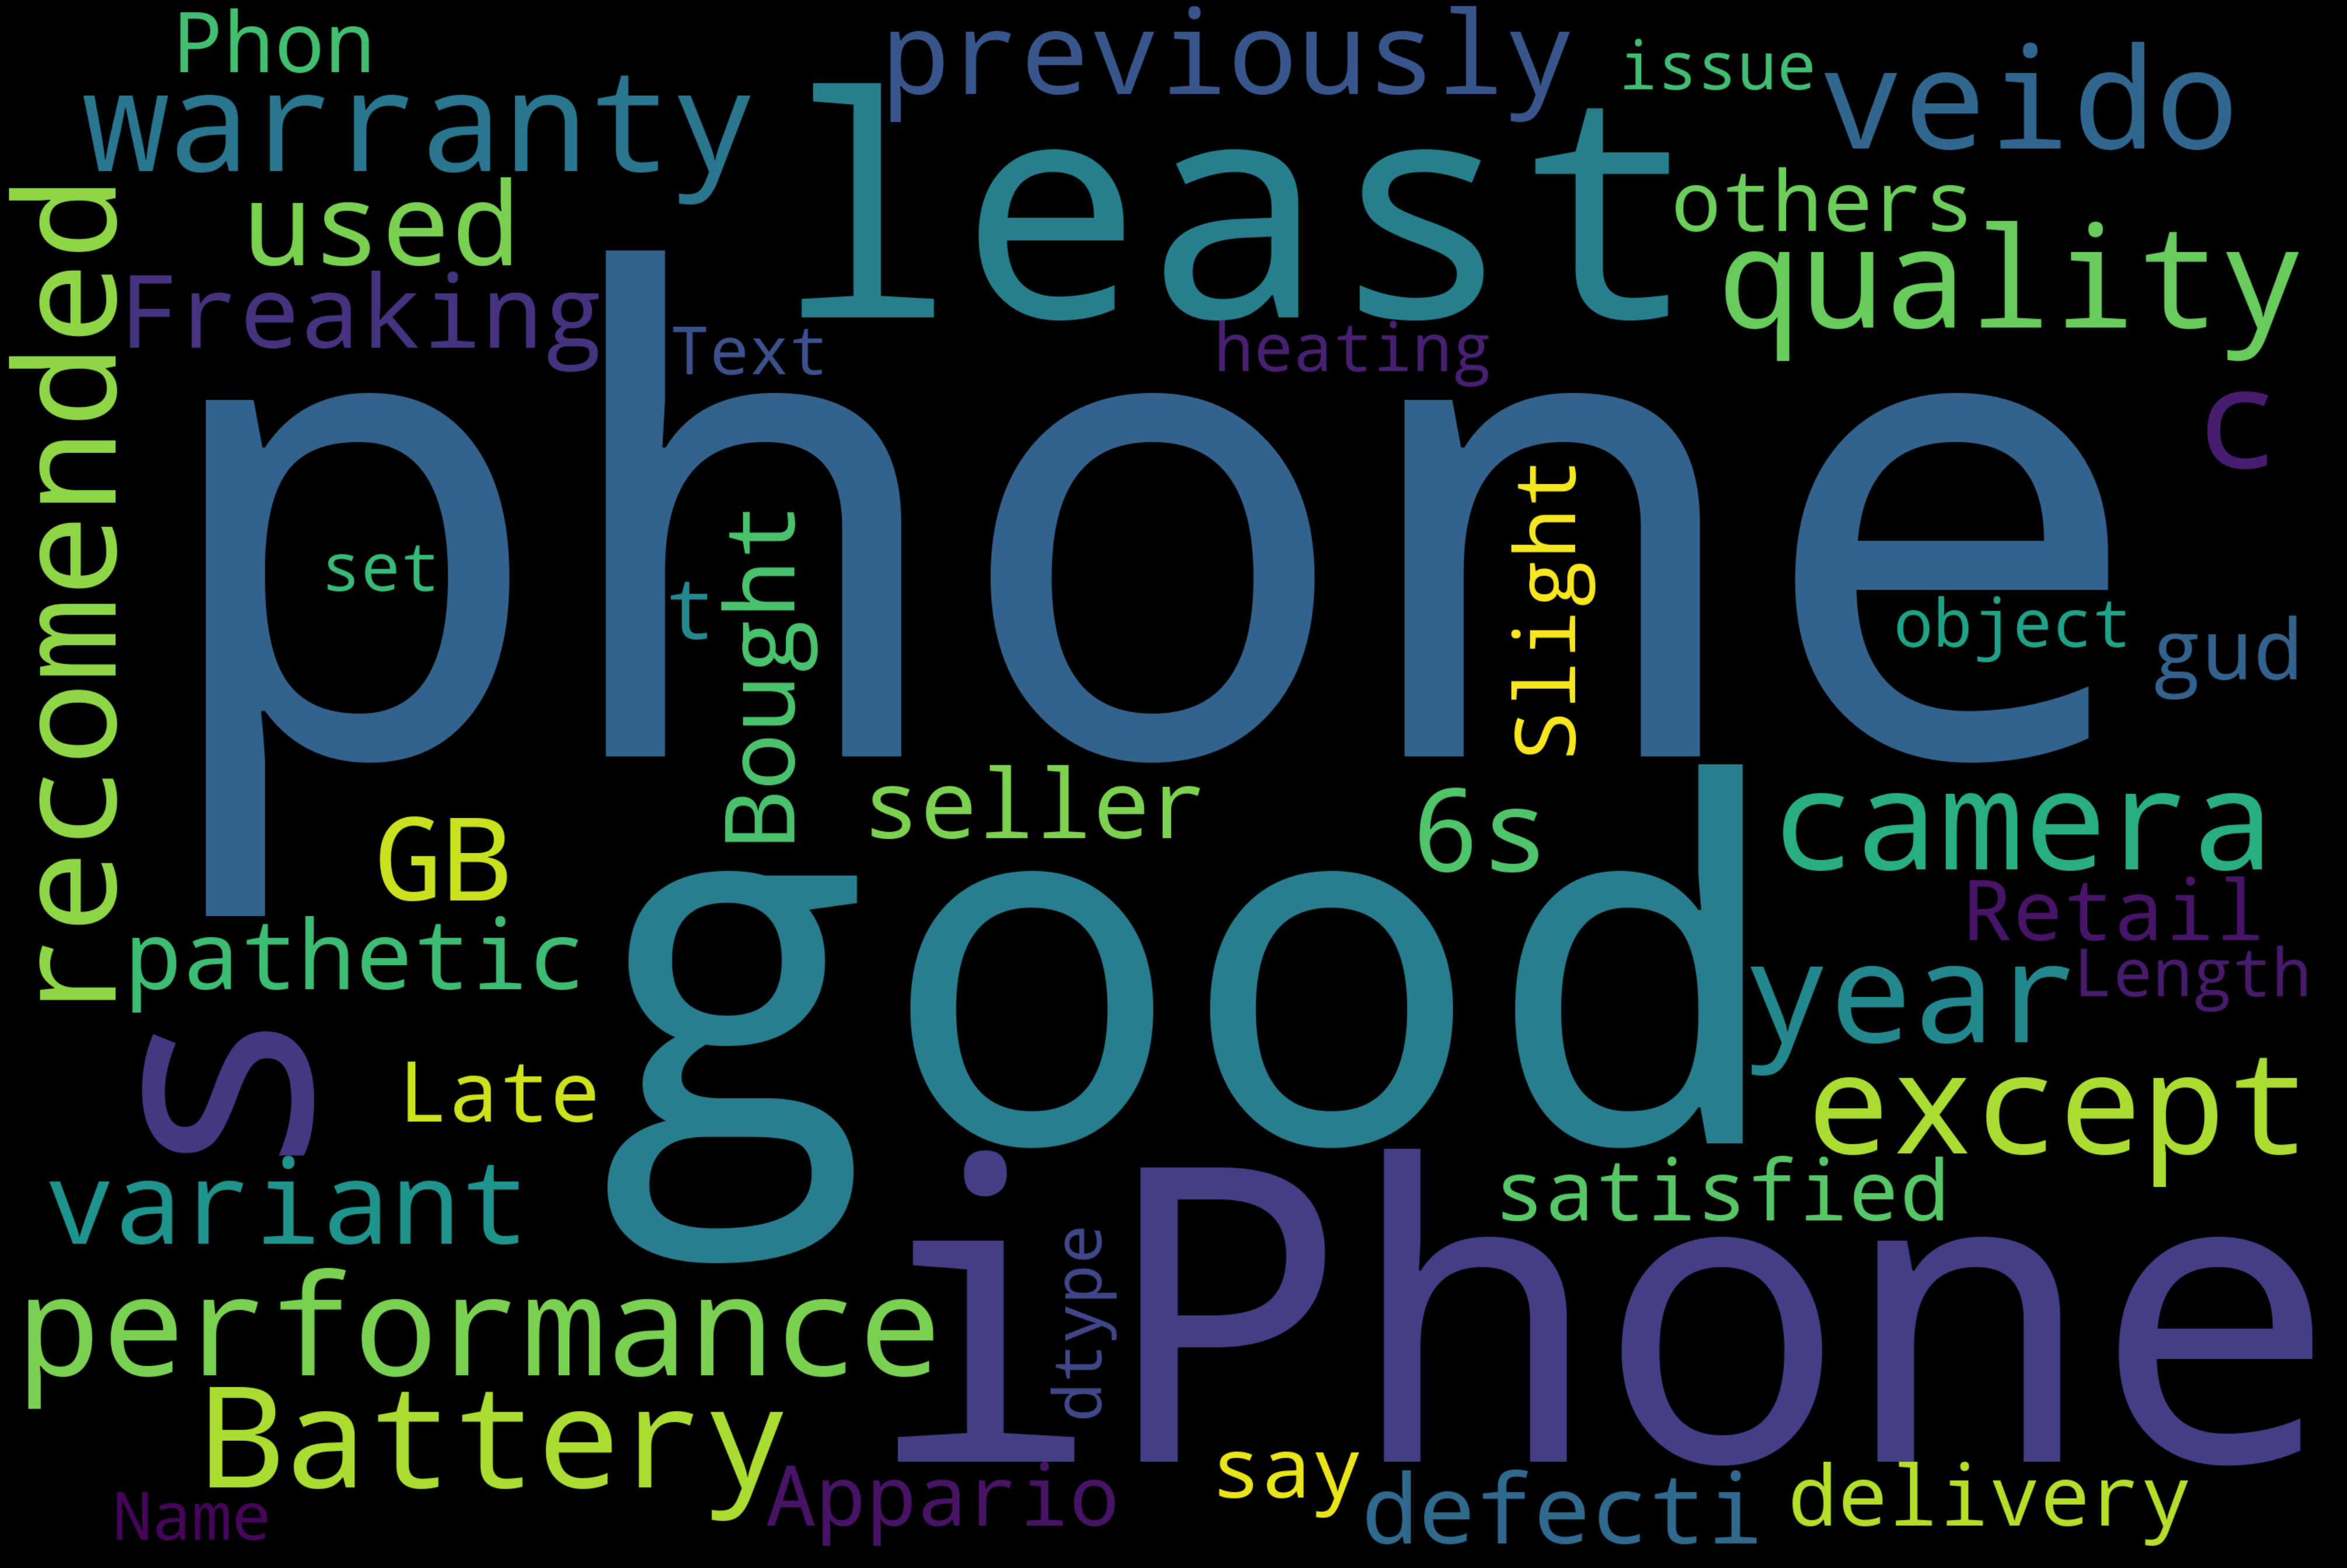

In [26]:
#negative word cloud
text = review_neg["Text"]
wordcloud = WordCloud(width=3000,height=2000, background_color='black',stopwords=STOPWORDS).generate(str(text))

fig = plt.figure(figsize=(40,30),facecolor='k',edgecolor='k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [27]:
# Features and Labels split
Xfeatures = df['Clean_text']
ylabels = df['Sentiment']

In [28]:
# Train and test split
# Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [29]:
x_train.shape

(2142,)

In [30]:
x_test.shape

(919,)

In [31]:
y_train.shape

(2142,)

In [32]:
y_test.shape

(919,)

# Model Building

### 1. Logistics regression

In [33]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression(max_iter=200,C=1,multi_class='ovr'))])
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr',
                 LogisticRegression(C=1, max_iter=200, multi_class='ovr'))])

In [34]:
pipe_lr_train = pipe_lr.predict(x_train)
print(pd.crosstab(y_train,pipe_lr_train))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative        121        6        19
Neutral           0      252        11
Positive          0        2      1731


In [35]:
pipe_lr_test=pipe_lr.predict(x_test)
print(pd.crosstab(y_test,pipe_lr_test))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative         16       11        47
Neutral           1       72        37
Positive          8       25       702


In [36]:
accuracy_log_train=accuracy_score(y_train,pipe_lr_train)
accuracy_log_train

0.9822595704948646

In [37]:
accuracy_log_test=accuracy_score(y_test,pipe_lr_test)
accuracy_log_test

0.8596300326441785

In [38]:
print(classification_report(y_test,pipe_lr_test))

              precision    recall  f1-score   support

    Negative       0.64      0.22      0.32        74
     Neutral       0.67      0.65      0.66       110
    Positive       0.89      0.96      0.92       735

    accuracy                           0.86       919
   macro avg       0.73      0.61      0.64       919
weighted avg       0.85      0.86      0.84       919



In [39]:
f1_score_lg = f1_score(y_true=y_test,y_pred = pipe_lr_test,average='macro')
f1_score_lg

0.6356199016749476

In [40]:
recall_lg=recall_score(y_true=y_test,y_pred= pipe_lr_test,average='macro')
print(f"Recall score using Logistic Regression is {recall_lg}")

Recall score using Logistic Regression is 0.6086212371926658


In [41]:
precision_lg=precision_score(y_true=y_test,y_pred=pipe_lr_test,average='macro')
print(f"Precision Score using Logistic Regression is {precision_lg}")

Precision Score using Logistic Regression is 0.7332654792196777


### 2. SVM

In [42]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svm',SVC(gamma=1,C=1,kernel='rbf',decision_function_shape='ovo'))])
pipe_svm.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('svm', SVC(C=1, decision_function_shape='ovo', gamma=1))])

In [43]:
pipe_svm_train = pipe_svm.predict(x_train)
print(pd.crosstab(y_train,pipe_svm_train))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative        142        1         3
Neutral           0      259         4
Positive          0        1      1732


In [44]:
pipe_svm_test=pipe_svm.predict(x_test)
print(pd.crosstab(y_test,pipe_svm_test))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative          1        0        73
Neutral           0       35        75
Positive          0        4       731


In [45]:
accuracy_svm_train=accuracy_score(y_train,pipe_svm_train)
accuracy_svm_train

0.9957983193277311

In [46]:
accuracy_svm_test=accuracy_score(y_test,pipe_svm_test)
accuracy_svm_test

0.8346028291621328

In [47]:
print(classification_report(y_test,pipe_svm_test))

              precision    recall  f1-score   support

    Negative       1.00      0.01      0.03        74
     Neutral       0.90      0.32      0.47       110
    Positive       0.83      0.99      0.91       735

    accuracy                           0.83       919
   macro avg       0.91      0.44      0.47       919
weighted avg       0.85      0.83      0.78       919



In [48]:
f1_score_svm = f1_score(y_true=y_test,y_pred = pipe_svm_test,average='macro')
f1_score_svm

0.4674297880126077

In [49]:
recall_svm=recall_score(y_true=y_test,y_pred= pipe_svm_test,average='macro')
print(f"Recall score using Support Vectore Machine is {recall_svm}")

Recall score using Support Vectore Machine is 0.44208438494152774


In [50]:
precision_svm=precision_score(y_true=y_test,y_pred=pipe_svm_test,average='macro')
print(f"Precision Score using Support Vector Machine is {precision_svm}")

Precision Score using Support Vector Machine is 0.9096875820425309


### 3. Naive Bayes

In [51]:
pipe_nb = Pipeline(steps=[('cv',CountVectorizer()),('mb',MultinomialNB())])
pipe_nb.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('mb', MultinomialNB())])

In [52]:
pipe_nb_train = pipe_nb.predict(x_train)
print(pd.crosstab(y_train,pipe_nb_train))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative         59        0        87
Neutral           0       70       193
Positive          1        1      1731


In [53]:
pipe_nb_test=pipe_nb.predict(x_test)
print(pd.crosstab(y_test,pipe_nb_test))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative          1        0        73
Neutral           1        4       105
Positive          0        0       735


In [54]:
accuracy_nb_train=accuracy_score(y_train,pipe_nb_train)
accuracy_nb_train

0.8683473389355743

In [55]:
accuracy_nb_test=accuracy_score(y_test,pipe_nb_test)
accuracy_nb_test

0.8052230685527747

In [56]:
print(classification_report(y_test,pipe_nb_test))

              precision    recall  f1-score   support

    Negative       0.50      0.01      0.03        74
     Neutral       1.00      0.04      0.07       110
    Positive       0.81      1.00      0.89       735

    accuracy                           0.81       919
   macro avg       0.77      0.35      0.33       919
weighted avg       0.80      0.81      0.72       919



In [57]:
f1_score_nb = f1_score(y_true=y_test,y_pred = pipe_nb_test,average='macro')
f1_score_nb

0.3294938397774371

In [58]:
recall_nb=recall_score(y_true=y_test,y_pred= pipe_nb_test,average='macro')
print(f"Recall score using Naive Bayes is {recall_nb}")

Recall score using Naive Bayes is 0.34995904995905


In [59]:
precision_nb=precision_score(y_true=y_test,y_pred=pipe_nb_test,average='macro')
print(f"Precision Score using Naive Bayes is {precision_nb}")

Precision Score using Naive Bayes is 0.7683461117196057


### 4. Decision Tree

In [60]:
pipe_dt = Pipeline(steps=[('cv',CountVectorizer()),('dt',DecisionTreeClassifier(class_weight='balanced',
                                criterion='entropy',
                                max_depth=3,
                                min_samples_split=6))])
pipe_dt.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('dt',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=3,
                                        min_samples_split=6))])

In [61]:
pipe_dt_train = pipe_dt.predict(x_train)
print(pd.crosstab(y_train,pipe_dt_train))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative          4      125        17
Neutral           0      259         4
Positive          2      819       912


In [62]:
pipe_dt_test=pipe_dt.predict(x_test)
print(pd.crosstab(y_test,pipe_dt_test))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative          1       62        11
Neutral           0      109         1
Positive          0      345       390


In [63]:
accuracy_dt_train=accuracy_score(y_train,pipe_dt_train)
accuracy_dt_train

0.5485527544351074

In [64]:
accuracy_dt_test=accuracy_score(y_test,pipe_dt_test)
accuracy_dt_test

0.544069640914037

In [65]:
print(classification_report(y_test,pipe_dt_test))

              precision    recall  f1-score   support

    Negative       1.00      0.01      0.03        74
     Neutral       0.21      0.99      0.35       110
    Positive       0.97      0.53      0.69       735

    accuracy                           0.54       919
   macro avg       0.73      0.51      0.35       919
weighted avg       0.88      0.54      0.59       919



In [66]:
f1_score_dt = f1_score(y_true=y_test,y_pred = pipe_dt_test,average='macro')
f1_score_dt

0.3536417697676096

In [67]:
recall_dt=recall_score(y_true=y_test,y_pred= pipe_dt_test,average='macro')
print(f"Recall score using Decision Tree is {recall_dt}")

Recall score using Decision Tree is 0.5116782831068546


In [68]:
precision_dt=precision_score(y_true=y_test,y_pred=pipe_dt_test,average='macro')
print(f"Precision Score using Decision Tree is {precision_dt}")

Precision Score using Decision Tree is 0.7271298546029542


### 5. Random Forest

In [69]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf',RandomForestClassifier(n_estimators=100,
                                 class_weight='balanced',
                                 criterion='entropy',
                                 max_depth=3,
                                 max_samples=0.7,
                                 min_samples_split=6))])
pipe_rf.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=3,
                                        max_samples=0.7,
                                        min_samples_split=6))])

In [70]:
pipe_rf_train = pipe_rf.predict(x_train)
print(pd.crosstab(y_train,pipe_rf_train))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative         74       58        14
Neutral           1      254         8
Positive         46      400      1287


In [71]:
pipe_rf_test=pipe_rf.predict(x_test)
print(pd.crosstab(y_test,pipe_rf_test))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative         15       40        19
Neutral           3      105         2
Positive         36      163       536


In [72]:
accuracy_rf_train=accuracy_score(y_train,pipe_rf_train)
accuracy_rf_train

0.753968253968254

In [73]:
accuracy_rf_test=accuracy_score(y_test,pipe_rf_test)
accuracy_rf_test

0.7138193688792165

In [74]:
print(classification_report(y_test,pipe_rf_test))

              precision    recall  f1-score   support

    Negative       0.28      0.20      0.23        74
     Neutral       0.34      0.95      0.50       110
    Positive       0.96      0.73      0.83       735

    accuracy                           0.71       919
   macro avg       0.53      0.63      0.52       919
weighted avg       0.83      0.71      0.74       919



In [75]:
f1_score_rf = f1_score(y_true=y_test,y_pred = pipe_rf_test,average='macro')
f1_score_rf

0.5221629022422366

In [76]:
recall_rf=recall_score(y_true=y_test,y_pred= pipe_rf_test,average='macro')
print(f"Recall score using Random Forest is {recall_rf}")

Recall score using Random Forest is 0.6288332859761431


In [77]:
precision_rf=precision_score(y_true=y_test,y_pred=pipe_rf_test,average='macro')
print(f"Precision Score using Random Forest is {precision_rf}")

Precision Score using Random Forest is 0.5269949646071729


### 6. KNN

In [78]:
pipe_knn = Pipeline(steps=[('cv',CountVectorizer()),('knn',KNeighborsClassifier(n_neighbors = 1))])
pipe_knn.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

In [79]:
pipe_knn_train = pipe_knn.predict(x_train)
print(pd.crosstab(y_train,pipe_knn_train))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative        146        0         0
Neutral           0      261         2
Positive          0       13      1720


In [80]:
pipe_knn_test=pipe_knn.predict(x_test)
print(pd.crosstab(y_test,pipe_knn_test))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative          9       35        30
Neutral           1       89        20
Positive         11      128       596


In [81]:
accuracy_knn_train=accuracy_score(y_train,pipe_knn_train)
accuracy_knn_train

0.9929971988795518

In [82]:
accuracy_knn_test=accuracy_score(y_test,pipe_knn_test)
accuracy_knn_test

0.7551686615886833

In [83]:
print(classification_report(y_test,pipe_knn_test))

              precision    recall  f1-score   support

    Negative       0.43      0.12      0.19        74
     Neutral       0.35      0.81      0.49       110
    Positive       0.92      0.81      0.86       735

    accuracy                           0.76       919
   macro avg       0.57      0.58      0.51       919
weighted avg       0.81      0.76      0.76       919



In [84]:
f1_score_knn = f1_score(y_true=y_test,y_pred = pipe_knn_test,average='macro')
f1_score_knn

0.5147763472154288

In [85]:
recall_knn=recall_score(y_true=y_test,y_pred= pipe_knn_test,average='macro')
print(f"Recall score using KNN is {recall_knn}")

Recall score using KNN is 0.580532294818009


In [86]:
precision_knn=precision_score(y_true=y_test,y_pred=pipe_knn_test,average='macro')
print(f"Precision Score using KNN is {precision_knn}")

Precision Score using KNN is 0.5681155503136927


### 7. Bagging

In [87]:
pipe_bag = Pipeline(steps=[('cv',CountVectorizer()),('bag',BaggingClassifier(n_estimators = 100))])
pipe_bag.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('bag', BaggingClassifier(n_estimators=100))])

In [88]:
pipe_bag_train = pipe_bag.predict(x_train)
print(pd.crosstab(y_train,pipe_bag_train))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative        146        0         0
Neutral           0      259         4
Positive          0        1      1732


In [89]:
pipe_bag_test=pipe_bag.predict(x_test)
print(pd.crosstab(y_test,pipe_bag_test))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative         15       22        37
Neutral           1       89        20
Positive          9       34       692


In [90]:
accuracy_bag_train=accuracy_score(y_train,pipe_bag_train)
accuracy_bag_train

0.9976657329598506

In [91]:
accuracy_bag_test=accuracy_score(y_test,pipe_bag_test)
accuracy_bag_test

0.8661588683351469

In [92]:
print(classification_report(y_test,pipe_bag_test))

              precision    recall  f1-score   support

    Negative       0.60      0.20      0.30        74
     Neutral       0.61      0.81      0.70       110
    Positive       0.92      0.94      0.93       735

    accuracy                           0.87       919
   macro avg       0.71      0.65      0.64       919
weighted avg       0.86      0.87      0.85       919



In [93]:
f1_score_bag = f1_score(y_true=y_test,y_pred = pipe_bag_test,average='macro')
f1_score_bag

0.6445613579908808

In [94]:
recall_bag=recall_score(y_true=y_test,y_pred= pipe_bag_test,average='macro')
print(f"Recall score using Bagging is {recall_bag}")

Recall score using Bagging is 0.6510967368110224


In [95]:
precision_bag=precision_score(y_true=y_test,y_pred=pipe_bag_test,average='macro')
print(f"Precision Score using Bagging is {precision_bag}")

Precision Score using Bagging is 0.712563878274481


# Model Comparison

In [97]:
model_accuracy={'Model':pd.Series(['Logistic Regression','SVM','Naive Bayes','Decision Tree','Random Forest','KNN','Bagging']),
                'Train Accuracy':pd.Series([accuracy_log_train,accuracy_svm_train,accuracy_nb_train,accuracy_dt_train,accuracy_rf_train,accuracy_knn_train,accuracy_bag_train]),
               'Test Accuracy':pd.Series([accuracy_log_test,accuracy_svm_test,accuracy_nb_test,accuracy_dt_test,accuracy_rf_test,accuracy_knn_test,accuracy_bag_test]),
               'F1 Score':pd.Series([f1_score_lg,f1_score_svm,f1_score_nb,f1_score_dt,f1_score_rf,f1_score_knn,f1_score_bag]),
               'Precision':pd.Series([precision_lg,precision_svm,precision_nb,precision_dt,precision_rf,precision_knn,precision_bag]),
               'Recall Score':pd.Series([recall_lg,recall_svm,recall_nb,recall_dt,recall_rf,recall_knn,recall_bag])}

metrics_table=pd.DataFrame(model_accuracy)
metrics_table.sort_values(['F1 Score'],ascending=False)

Model  Train Accuracy  Test Accuracy  F1 Score  Precision  \
6              Bagging        0.997666       0.866159  0.644561   0.712564   
0  Logistic Regression        0.982260       0.859630  0.635620   0.733265   
4        Random Forest        0.753968       0.713819  0.522163   0.526995   
5                  KNN        0.992997       0.755169  0.514776   0.568116   
1                  SVM        0.995798       0.834603  0.467430   0.909688   
3        Decision Tree        0.548553       0.544070  0.353642   0.727130   
2          Naive Bayes        0.868347       0.805223  0.329494   0.768346   

   Recall Score  
6      0.651097  
0      0.608621  
4      0.628833  
5      0.580532  
1      0.442084  
3      0.511678  
2      0.349959

# Deployment

In [98]:
# Save Model and Pipepline
import joblib
pipeline_file = open("app.pkl","wb")
joblib.dump(pipe_bag,pipeline_file)
pipeline_file.close()

In [ ]:
!streamlit run model.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8504
  Network URL: http://192.168.29.152:8504

2022-11-18 11:56:07.324 `label` got an empty value. This is discouraged for accessibility reasons and may be disallowed in the future by raising an exception. Please provide a non-empty label and hide it with label_visibility if needed.
2022-11-18 11:56:11.842 `label` got an empty value. This is discouraged for accessibility reasons and may be disallowed in the future by raising an exception. Please provide a non-empty label and hide it with label_visibility if needed.
2022-11-18 11:56:18.519 `label` got an empty value. This is discouraged for accessibility reasons and may be disallowed in the future by raising an exception. Please provide a non-empty label and hide it with label_visibility if needed.
2022-11-18 11:56:37.878 `label` got an empty value. This is discouraged for accessibility reasons and may be disallowed in the future by raising an except